In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
df

A   B
0  1  10
1  2  20
2  3  30

In [7]:
def topla_10(x):
    return x + 10


In [8]:
df.apply(topla_10)

A   B
0  11  20
1  12  30
2  13  40

In [9]:
df.transform(topla_10)

A   B
0  11  20
1  12  30
2  13  40

In [10]:
df

A   B
0  1  10
1  2  20
2  3  30

In [11]:
df.transform("sqrt")

A         B
0  1.000000  3.162278
1  1.414214  4.472136
2  1.732051  5.477226

In [12]:
df.apply("sqrt") ## hata verir 

AttributeError: 'DataFrame' object has no attribute 'sqrt'

In [13]:
df.transform([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [14]:
df.apply([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [15]:
df.transform({"A": np.sqrt, "B": np.exp})

A             B
0  1.000000  2.202647e+04
1  1.414214  4.851652e+08
2  1.732051  1.068647e+13

In [16]:
def cıkarma(x):
    return x["B"] - x["A"]

In [19]:
df.apply(cıkarma,axis = 1)

0     9
1    18
2    27
dtype: int64

In [21]:
df.transform(cıkarma, axis = 1 ) # hatalı sonuc verir cünkü transform tekli serilerle çalısır.

ValueError: transforms cannot produce aggregated results

In [22]:
df1 = pd.DataFrame({'A':[1, 2, np.nan],
                  'B':[5, np.nan, np.nan],
                  'C':[1, 2, 3]})

In [23]:
df1

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  NaN  NaN  3

In [34]:
df1.dropna(thresh = 1) # satır dropna

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  NaN  NaN  3

In [28]:
df1.dropna(thresh = 2 , axis = 1 ) # kolon dropna 

A  C
0  1.0  1
1  2.0  2
2  NaN  3

In [36]:
df1["A"].fillna(value = df1["A"].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [37]:
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])

In [38]:
df2 = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}
)

In [39]:
df2

Var1  Var2  Var3
0   2.0   8.0   NaN
1   3.0   NaN  13.0
2   5.0   5.0   5.0
3   NaN   8.0   6.0
4   7.0  11.0  13.0
5   1.0   NaN   7.0
6   NaN   NaN   NaN
7  10.0   2.0   3.0
8  14.0   3.0  30.0

In [41]:
df2["Var1"].fillna(0)

0     2.0
1     3.0
2     5.0
3     0.0
4     7.0
5     1.0
6     0.0
7    10.0
8    14.0
Name: Var1, dtype: float64

In [42]:
df2["Var2"].mean()

6.166666666666667

In [43]:
df2["Var2"].fillna(df2["Var2"].mean())

0     8.000000
1     6.166667
2     5.000000
3     8.000000
4    11.000000
5     6.166667
6     6.166667
7     2.000000
8     3.000000
Name: Var2, dtype: float64

In [44]:
df2.apply(lambda x: x.fillna(x.mean()), axis = 0)

Var1       Var2  Var3
0   2.0   8.000000  11.0
1   3.0   6.166667  13.0
2   5.0   5.000000   5.0
3   6.0   8.000000   6.0
4   7.0  11.000000  13.0
5   1.0   6.166667   7.0
6   6.0   6.166667  11.0
7  10.0   2.000000   3.0
8  14.0   3.000000  30.0

In [45]:
df2["Var3"].fillna(df2["Var3"].median())  # yine var3 teki NaN ları var3 median ile doldurma

0     7.0
1    13.0
2     5.0
3     6.0
4    13.0
5     7.0
6     7.0
7     3.0
8    30.0
Name: Var3, dtype: float64

In [46]:
Var1 = np.array([1,3,6,np.NaN,7,1,9,np.NaN,15])
Var2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
Var3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
Var4 = np.array(["IT","IT","IT","HR","HR","HR","HR","IT","IT"])
df3 = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}
)

In [47]:
df3

salary  Var2  Var3 department
0     1.0   7.0   NaN         IT
1     3.0   NaN  12.0         IT
2     6.0   5.0   5.0         IT
3     NaN   8.0   6.0         HR
4     7.0  12.0  14.0         HR
5     1.0   NaN   7.0         HR
6     9.0   NaN   NaN         HR
7     NaN   2.0   2.0         IT
8    15.0   3.0  31.0         IT

In [48]:
df3.groupby("department")["salary"].mean()

department
HR    5.666667
IT    6.250000
Name: salary, dtype: float64

In [49]:
df3.salary.mean()

6.0

In [50]:
df3["salary"].fillna(df3.groupby("department")["salary"].transform("mean")) 
# transformun içine verdiğim fonksiyon ile Nan olan tüm değerleri ilgili departmandaki ortalama değerler ile değiştirdi.
# apply str olarak değil np.mean olarak yazılırsa o da kullanılır

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

In [51]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"HR","HR","HR","HR",np.nan,"IT","HR"], dtype=object)
df4 = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}
)
df4

salary department
0     1.0         IT
1     3.0        NaN
2     6.0         HR
3     NaN         HR
4     7.0         HR
5     1.0         HR
6     NaN        NaN
7     9.0         IT
8    15.0         HR

In [52]:
df4["department"].fillna(method = "ffill")
# forward fill , Nan değer varsa ondekininin değerini alıyor

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [53]:
df4["department"].fillna(method = "bfill")
# back fill , Nan değer varsa sonrakinin değerini alıyor

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    IT
7    IT
8    HR
Name: department, dtype: object

In [54]:
df5 = sns.load_dataset("diamonds")

In [55]:
df5.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

<AxesSubplot:xlabel='table'>

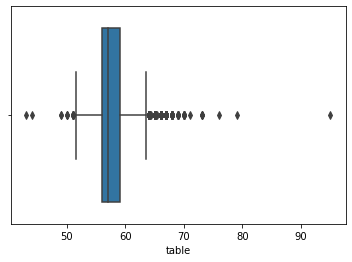

In [56]:
sns.boxplot(x = df5.table)

In [57]:
df5.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [61]:
Q1 = df5["table"].quantile(0.25)

In [62]:
Q1

56.0

In [63]:
Q3 = df5["table"].quantile(0.75)

In [64]:
Q3

59.0

In [65]:
IQR = Q3 - Q1

In [66]:
IQR

3.0

In [67]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [70]:
outlier_low = df5[df5["table"] < lower_lim] # outlierları temsil ediyor

carat        cut color clarity  depth  table  price     x     y     z
1515    0.91       Fair     F     SI2   65.3   51.0   2996  6.05  5.98  3.93
3238    0.94       Fair     H     SI2   66.0   50.1   3353  6.13  6.17  4.06
3979    1.00    Premium     H     SI1   62.2   51.0   3511  6.47  6.40  4.00
4150    0.91    Premium     F     SI2   61.0   51.0   3546  6.24  6.21  3.80
5979    1.00       Fair     I     VS1   64.0   49.0   3951  6.43  6.39  4.10
7418    1.02       Fair     F     SI1   61.8   50.0   4227  6.59  6.51  4.05
8853    1.00       Fair     E     VS2   66.4   51.0   4480  6.31  6.22  4.16
11368   1.04      Ideal     I     VS1   62.9   43.0   4997  6.45  6.41  4.04
22701   0.30       Fair     E     SI1   64.5   49.0    630  4.28  4.25  2.75
25179   2.00       Fair     H     SI1   61.2   50.0  13764  8.17  8.08  4.97
26387   2.01       Good     H     SI2   64.0   51.0  15888  8.08  8.01  5.15
33586   0.37    Premium     F     VS1   62.7   51.0    833  4.65  4.57  2.89
35633   0.29  Very Good     E     VS1   62.8   44.0    474  4.20  4.24  2.65
45798   0.51       Fair     E     VS2   65.5   51.0   1709  5.06  5.01  3.30
46040   0.57       Good     H     VS1   63.7   51.0   1728  5.36  5.29  3.39
47630   0.67       Good     I    VVS2   58.9   51.0   1882  5.74  5.78  3.40

In [71]:
outlier_high = df5[df5["table"] > upper_lim]

In [72]:
outlier_high

carat        cut color clarity  depth  table  price     x     y     z
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
91      0.86       Fair     E     SI2   55.1   69.0   2757  6.45  6.33  3.52
145     0.70       Good     H    VVS2   62.1   64.0   2767  5.62  5.65  3.50
219     0.53  Very Good     D    VVS2   57.5   64.0   2782  5.34  5.37  3.08
227     0.84       Fair     G     SI1   55.1   67.0   2782  6.39  6.20  3.47
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53695   0.75       Good     E     VS2   59.7   65.0   2717  5.85  5.80  3.48
53697   0.70       Fair     H    VVS2   64.5   65.0   2717  5.52  5.45  3.54
53756   0.84       Fair     G     VS1   55.6   64.0   2724  6.42  6.32  3.54
53757   0.72       Fair     F     VS2   55.4   64.0   2724  6.06  5.97  3.34
53785   0.89       Good     E     SI2   64.3   65.0   2728  6.00  5.95  3.84

[589 rows x 10 columns]

In [78]:
df5["table"][(df5["table"] < lower_lim) | (df5["table"] >  upper_lim)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [79]:
df5[((df5["table"] < lower_lim) | (df5["table"] > upper_lim))]

carat        cut color clarity  depth  table  price     x     y     z
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
91      0.86       Fair     E     SI2   55.1   69.0   2757  6.45  6.33  3.52
145     0.70       Good     H    VVS2   62.1   64.0   2767  5.62  5.65  3.50
219     0.53  Very Good     D    VVS2   57.5   64.0   2782  5.34  5.37  3.08
227     0.84       Fair     G     SI1   55.1   67.0   2782  6.39  6.20  3.47
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53695   0.75       Good     E     VS2   59.7   65.0   2717  5.85  5.80  3.48
53697   0.70       Fair     H    VVS2   64.5   65.0   2717  5.52  5.45  3.54
53756   0.84       Fair     G     VS1   55.6   64.0   2724  6.42  6.32  3.54
53757   0.72       Fair     F     VS2   55.4   64.0   2724  6.06  5.97  3.34
53785   0.89       Good     E     SI2   64.3   65.0   2728  6.00  5.95  3.84

[605 rows x 10 columns]

In [81]:
df5[~((df5["table"] < lower_lim) | (df5["table"] > upper_lim))] 
# ~ kullanıldığında  table sütunu için outlier olmayan değerleri getirir yani q1 q3 arası

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53335 rows x 10 columns]

In [82]:
df5_cleaned = df5[~((df5["table"] < lower_lim) | (df5["table"] > upper_lim))] 

<AxesSubplot:xlabel='table'>

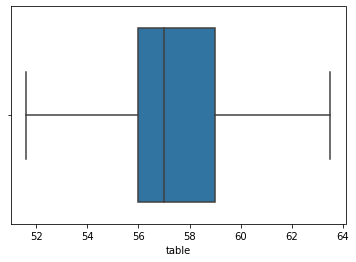

In [83]:
sns.boxplot(x = df5_cleaned.table)
# table sütunundaki outlierları temızledik


<AxesSubplot:xlabel='carat'>

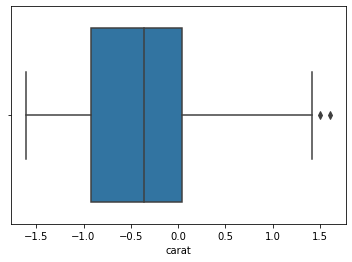

In [85]:
sns.boxplot(x = np.log(df5_cleaned.carat)) 
# sağa sola kuyruklu olan yapılar Outlierler için logaritma yöntemi kullanılabilir genellikle

In [86]:
from scipy.stats.mstats import winsorize

In [87]:
df_table_win = winsorize(df5["table"],(0.01,0.02))
# Verisetindeki uç değerlerin atılması yerine verisetindeki en yakın değerleri koyarak
# ortalamaya yaklaştırılmasını sağlayan istatistiki düzeltme tekniği

In [88]:
df_table_win

masked_array(data=[55., 61., 63., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

<AxesSubplot:>

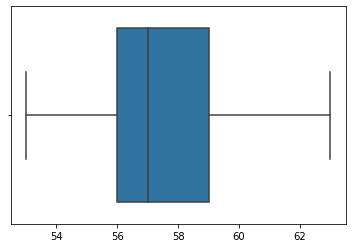

In [89]:
sns.boxplot(x = df_table_win)